In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [88]:
dir_path = "/mnt/d/dailywork/00_Mouse_brain/plot_data/"
data = sc.read_h5ad(dir_path + "EN_res.h5ad.gz")
data

AnnData object with n_obs × n_vars = 41287 × 23625
    obs: 'area', 'slices', 'sample', 'n_genes_by_counts', 'total_counts', 'predictions', 'pct_counts_mt', 'cell_type_I_v1', 'region_v1', 'cell_type_II_v1', 'cell_type_I', 'CT_I', 'CT_I_beforecz', 'leiden_0.5', 'compare', 'show'
    uns: 'leiden', 'leiden_0.5', 'leiden_0.5_colors', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [221]:
degs = pd.read_csv(dir_path + "deg.tsv", sep='\t', index_col=0)
print(degs.shape)

degs.head()

(840, 8)


,Group D1,Group D3,Group D7,Group D14,Group D28,Group H3,Group H6,Group H12
Scn4b,0,0,0,0,0,1,1,0
Robo1,0,1,0,0,0,0,0,0
Camk2g,0,0,0,0,0,1,0,1
Slco1a4,0,0,0,0,0,0,1,0
Ptges3,0,0,1,1,1,0,0,0


In [222]:
degs['total_count'] = degs.sum(axis=1)
degs['hyper_count'] = degs[["Group H3", "Group H6", "Group H12"]].sum(axis=1)
degs['acute_count'] = degs[['Group D1', 'Group D3']].sum(axis=1)
degs['subacute_count'] = degs['Group D7']
degs['chronic_count'] = degs[['Group D14', 'Group D28']].sum(axis=1)

degs.head()

,Group D1,Group D3,Group D7,Group D14,Group D28,Group H3,Group H6,Group H12,total_count,hyper_count,acute_count,subacute_count,chronic_count
Scn4b,0,0,0,0,0,1,1,0,2,2,0,0,0
Robo1,0,1,0,0,0,0,0,0,1,0,1,0,0
Camk2g,0,0,0,0,0,1,0,1,2,2,0,0,0
Slco1a4,0,0,0,0,0,0,1,0,1,1,0,0,0
Ptges3,0,0,1,1,1,0,0,0,3,0,0,1,2


In [223]:
# hyperacute
tmp_1 = degs[(degs['total_count'] == 3) & (degs['hyper_count'] == 2)].index.tolist()
tmp_2 = degs[(degs['total_count'] == 3) & (degs['hyper_count'] == 3)].index.tolist()
hyperacute = tmp_1 + tmp_2
# acute
acute = degs[(degs['total_count'] == 2) & (degs['acute_count'] == 2)].index.tolist()
# subacute
subacute = degs[(degs['subacute_count'] == 1) & (degs['total_count'] == 1)].index.tolist()
# chronic
chronic = degs[(degs['total_count'] == 2) & (degs['chronic_count'] == 2)].index.tolist()

In [224]:
combined_list = [hyperacute, acute, subacute, chronic]
len(combined_list)

4

In [225]:
for i in combined_list:
    print(len(i))

41
15
55
11


In [226]:
import itertools

markers = list(itertools.chain(*combined_list))
print(len(markers))

drop_dup_markers = []
for item in markers:
    if item not in drop_dup_markers:
        drop_dup_markers.append(item)

print(len(drop_dup_markers))

122
122


In [ ]:
['Naive', 'H3', 'H6', 'H12', 'D1', 'D3', 'D7', 'D14', 'D28']

In [64]:
sc.pp.subsample(data, 0.1)

In [145]:
data.obs['group'] = [i.split('-')[0] for i in data.obs['sample']]
data.obs['group'].value_counts()

group
D28      9211
D14      7163
D3       5336
D1       5077
D7       4693
H6       2566
H12      2550
H3       2481
Naive    2210
Name: count, dtype: int64

In [146]:
index_list = [data.obs[data.obs['group'] == 'Naive'].index.tolist() + data.obs[data.obs['group'] == 'H3'].index.tolist() + data.obs[data.obs['group'] == 'H6'].index.tolist() +
                data.obs[data.obs['group'] == 'H12'].index.tolist() + data.obs[data.obs['group'] == 'D1'].index.tolist() + data.obs[data.obs['group'] == 'D3'].index.tolist() +
                data.obs[data.obs['group'] == 'D7'].index.tolist() + data.obs[data.obs['group'] == 'D14'].index.tolist() + data.obs[data.obs['group'] == 'D28'].index.tolist()]

index_list = list(itertools.chain(*index_list))

In [147]:
exp = pd.DataFrame(
    data[index_list, markers].X.todense(),
    index=index_list,
    columns= markers
)

exp = exp.T

print(exp.shape)
exp.head()

(212, 41287)


,FP200000579TR_E3_26,FP200000579TR_E3_58,FP200000579TR_E3_105,FP200000579TR_E3_127,FP200000579TR_E3_131,FP200000579TR_E3_162,FP200000579TR_E3_210,FP200000579TR_E3_218,FP200000579TR_E3_225,FP200000579TR_E3_239,...,SS200000132TR_D1_131929,SS200000132TR_D1_132028,SS200000132TR_D1_132039,SS200000132TR_D1_132065,SS200000132TR_D1_132087,SS200000132TR_D1_132113,SS200000132TR_D1_132121,SS200000132TR_D1_132123,SS200000132TR_D1_132184,SS200000132TR_D1_132207
Bhlhe40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
Mobp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,3.134538,0.0,0.0,0.000000,0.0,0.0,0.0,2.480974,0.0,3.384052
Bzw1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,3.384052
Actr2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
Sptbn1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.470997,0.0,0.0,...,3.805685,0.0,0.0,3.023808,0.0,0.0,0.0,0.000000,0.0,0.000000


Text(0.5, 1.0, 'Trend Fit Clustering')

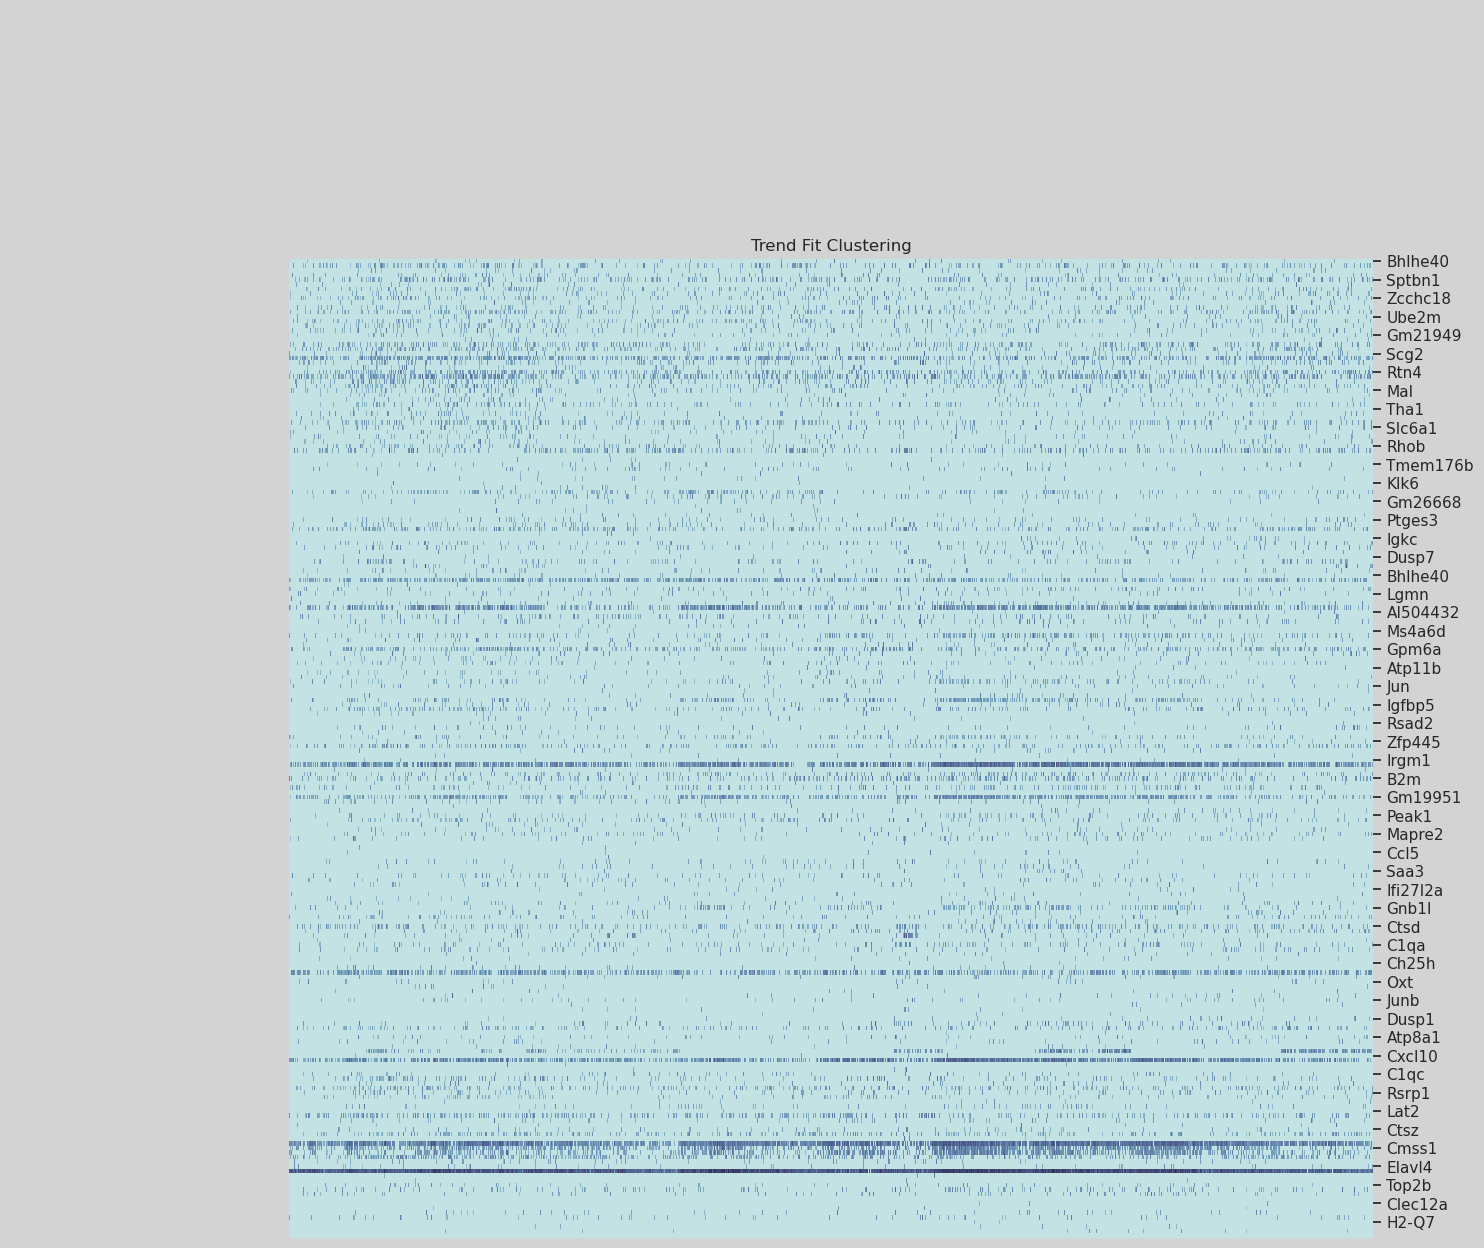

In [148]:
import seaborn as sns
import numpy as np

cmap = sns.color_palette( "ch:start=.2,rot=-.3", n_colors=1_000)
sns.set_context( context='paper')
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgrey'})

ax = sns.clustermap(exp, metric='euclidean', method='ward', col_cluster=False, row_cluster=False, cmap=cmap, figsize=(15,15))
ax.cax.set_visible(False)
num_stages = 6
ticks = np.linspace(0, exp.shape[1], num_stages)
ax.ax_heatmap.set_xticks( ticks)
# ax.ax_heatmap.set_xticklabels( adata.uns['stage_order'], rotation=90);
ax.ax_row_dendrogram.set_visible(True)
plt.setp( ax.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
ax.ax_heatmap.set_title( "Trend Fit Clustering")

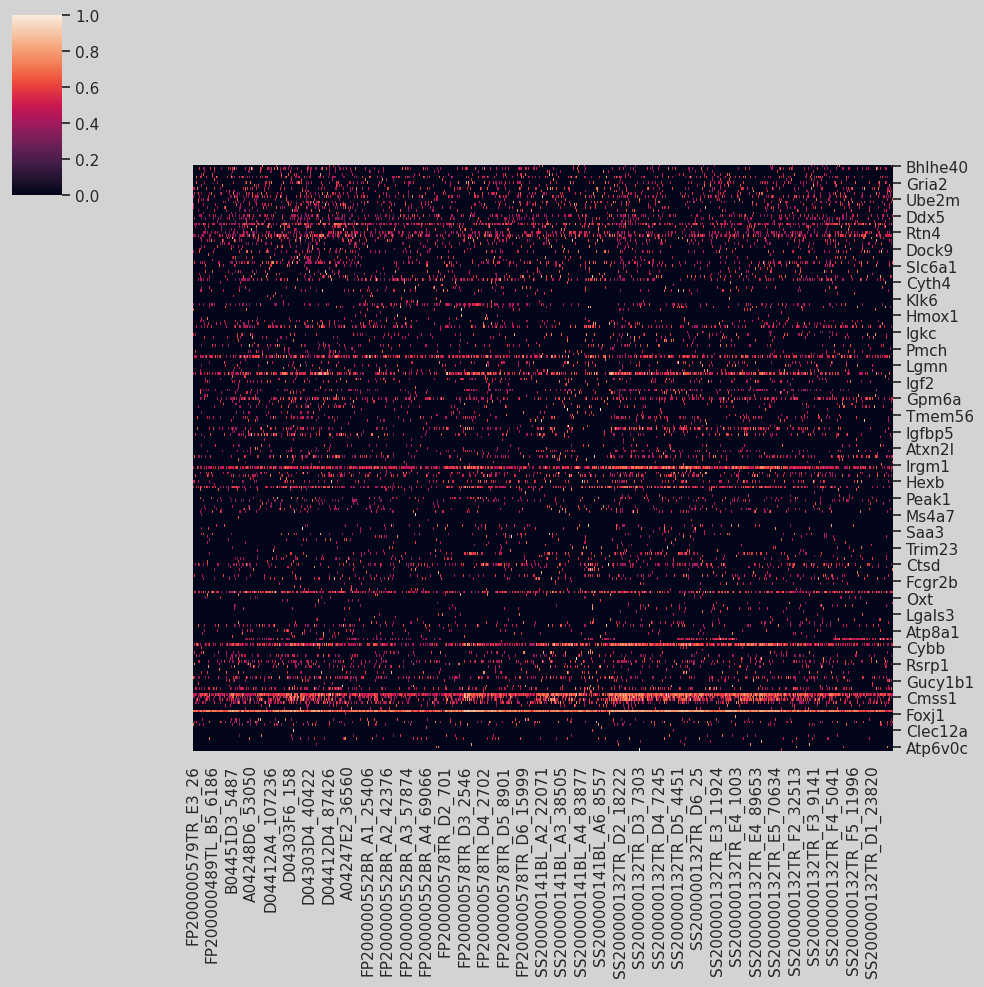

In [149]:
sns.clustermap(exp, col_cluster=False, row_cluster=False, standard_scale=0)

In [ ]:
import magic

model = magic.MAGIC()
exp_model = model.fit_transform(exp.T, genes = markers[:20])

Calculating MAGIC...
  Running MAGIC on 4128 cells and 499 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.15 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.87 seconds.
    Calculating affinities...
    Calculated affinities in 1.76 seconds.
  Calculated graph and diffusion operator in 3.79 seconds.
  Calculating imputation...
Calculated MAGIC in 3.81 seconds.


In [85]:
exp_scaled = exp.T * 2 - (exp.T.max() + exp.T.min()) / (exp.T.max() - exp.T.min())

In [86]:
exp_model = model.fit_transform(exp_scaled, genes = markers[:20])

Calculating MAGIC...
  Running MAGIC on 4128 cells and 499 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.96 seconds.
    Calculating affinities...
    Calculated affinities in 1.78 seconds.
  Calculated graph and diffusion operator in 3.87 seconds.
  Calculating imputation...
Calculated MAGIC in 3.89 seconds.


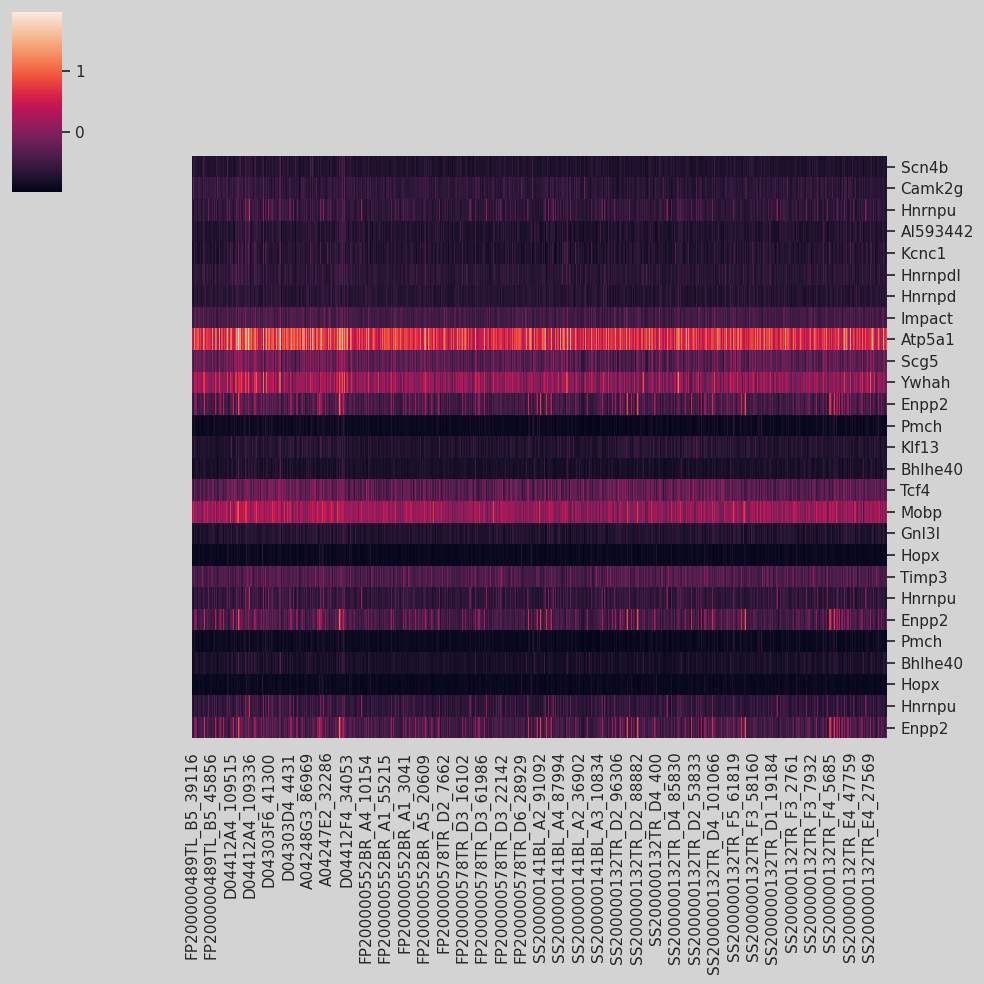

In [87]:
sns.clustermap(exp_model.T, col_cluster=False, row_cluster=False)

In [89]:
data

AnnData object with n_obs × n_vars = 41287 × 23625
    obs: 'area', 'slices', 'sample', 'n_genes_by_counts', 'total_counts', 'predictions', 'pct_counts_mt', 'cell_type_I_v1', 'region_v1', 'cell_type_II_v1', 'cell_type_I', 'CT_I', 'CT_I_beforecz', 'leiden_0.5', 'compare', 'show'
    uns: 'leiden', 'leiden_0.5', 'leiden_0.5_colors', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

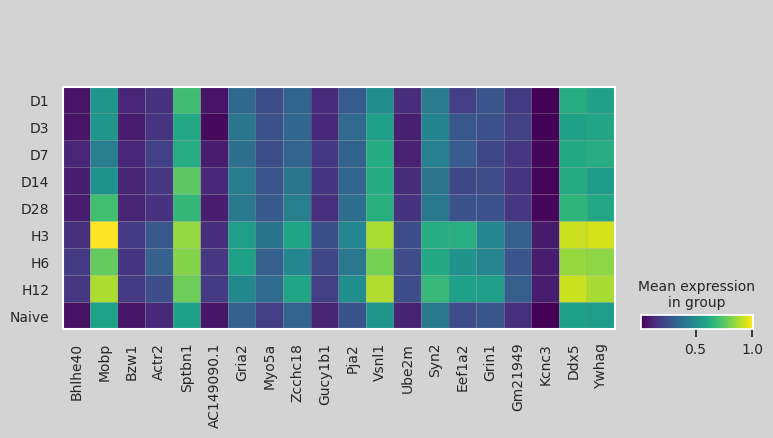

In [150]:
sc.pl.matrixplot(
    data,
    markers[:20],
    groupby="group",
    dendrogram=False,

)

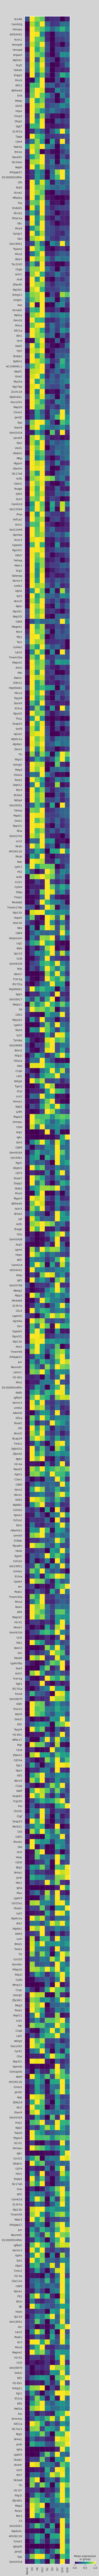

In [112]:
sc.pl.matrixplot(
    data,
    markers,
    groupby="group",
    dendrogram=False,
    swap_axes=True,
    categories_order = ['Naive', 'H3', 'H6', 'H12', 'D1', 'D3', 'D7', 'D14', 'D28'],
    standard_scale='var'
)

In [151]:
data.obs['group'] = pd.Categorical(
    data.obs['group'],
    categories=['Naive', 'H3', 'H6', 'H12', 'D1', 'D3', 'D7', 'D14', 'D28'], ordered=True
)

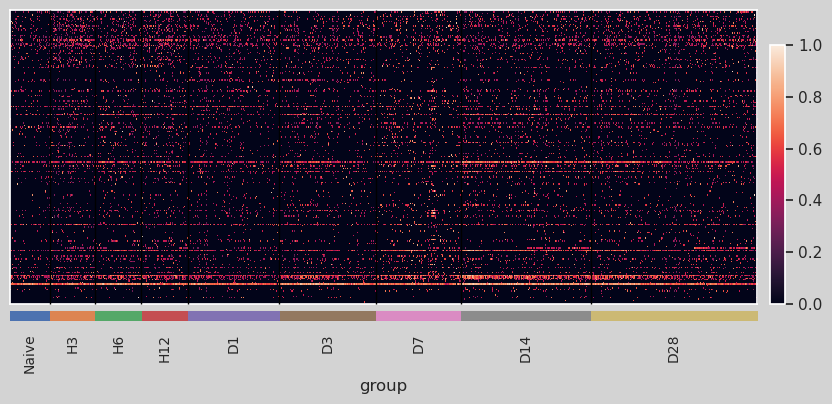

In [152]:
sc.pl.heatmap(
    data,
    markers,
    groupby="group",
    dendrogram=False,
    swap_axes=True,
    standard_scale='var')

In [170]:
data

AnnData object with n_obs × n_vars = 41287 × 23625
    obs: 'area', 'slices', 'sample', 'n_genes_by_counts', 'total_counts', 'predictions', 'pct_counts_mt', 'cell_type_I_v1', 'region_v1', 'cell_type_II_v1', 'cell_type_I', 'CT_I', 'CT_I_beforecz', 'leiden_0.5', 'compare', 'show', 'group'
    uns: 'leiden', 'leiden_0.5', 'leiden_0.5_colors', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap', 'group_colors'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [233]:
group_exp = pd.DataFrame(
    data[:, drop_dup_markers].X.todense(),
    columns=drop_dup_markers,
    index=data.obs.index
)

In [234]:
group_exp = group_exp.groupby(data.obs['group']).mean()
group_exp.index.name = None
group_exp.head()

/tmp/ipykernel_18628/1191578635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_exp = group_exp.groupby(data.obs['group']).mean()


,Bhlhe40,Mobp,Bzw1,Actr2,Sptbn1,AC149090.1,Gria2,Myo5a,Zcchc18,Gucy1b1,...,Cxcl12,Folr1,Clec12a,Srrm4os,Slc7a11,Alcam,H2-Q7,C3,Atp6v0c,Ighg2b
Naive,0.062331,0.583851,0.073851,0.126592,0.575745,0.073243,0.321179,0.196797,0.329441,0.114437,...,0.141039,0.000000,0.000000,0.000000,0.052047,0.103188,0.005724,0.000000,0.005954,0.0
H3,0.154849,1.002942,0.189902,0.283640,0.844022,0.146136,0.563098,0.395912,0.592282,0.252532,...,0.182379,0.008691,0.003117,0.002062,0.113109,0.195334,0.009373,0.000671,0.006544,0.0
H6,0.183334,0.769858,0.167930,0.319479,0.821396,0.173412,0.581337,0.311776,0.468409,0.227902,...,0.211820,0.002948,0.003875,0.004595,0.115885,0.190027,0.010901,0.000000,0.006869,0.0
H12,0.174620,0.882304,0.181037,0.250142,0.781585,0.190039,0.476188,0.362443,0.597962,0.201829,...,0.107463,0.015007,0.002617,0.003516,0.067388,0.134879,0.002959,0.003522,0.005291,0.0
D1,0.069346,0.535462,0.119507,0.159666,0.702000,0.068001,0.349071,0.244762,0.335012,0.135974,...,0.154524,0.001075,0.006448,0.005631,0.097353,0.139395,0.008129,0.010189,0.023767,0.0


In [240]:
scaled_exp = (group_exp - group_exp.min()) / (group_exp.max() - group_exp.min())

<Axes: >

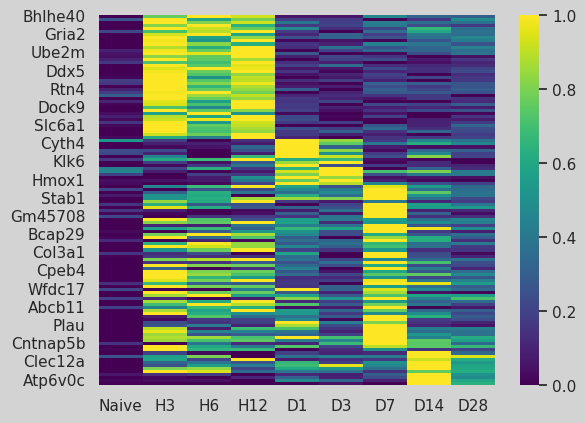

In [243]:
sns.heatmap(scaled_exp.T, vmax=1, vmin=0, cmap='viridis')

In [232]:
len(drop_dup_markers)

122